In [32]:
import numpy as np
import bct
#import nilearn
from nilearn import plotting

#--- specify input file
filename = 'data/matKFLB_sub01_ses1_pow_cor.txt'
       
#--- load matrix 
A = np.loadtxt(filename)
N = A.shape[0]       # number of nodes
M_sat = n*(n-1)/2    # max number of connections (in satrated graph)

In [33]:
#--- settings ------------------------------------------------------------------------------------------------------------
threshold = 0.25
#--- graph measures
N_rep_louvain = 10
gamma = 1

### Thresholding connectivity matrix

In [34]:
bct.threshold_proportional(A, p=threshold, copy=False );  # thresholding (with replacement)
A[np.nonzero(A<0)] = 0                                    # ensure only positive weights
M_act = A[np.nonzero(A>0)].shape[0]                       # actual number of nonzero connections

### Calculate graph vectors $\vec{G}=\left[S_{mean},Q,C_{mean},T,E^{glo},E^{loc}_{mean}\right]$

In [36]:
#--- average connection strength ----------------------------------------------------------------------------------------
S = np.sum(A)/M_act

#--- modularity ---------------------------------------------------------------------------------------------------------
[_,Qb] = bct.modularity_louvain_und(A, gamma)
for i in range(N_rep_louvain) :
    [_,Qt] = bct.modularity_louvain_und(A, gamma)
    if Qt > Qb :
        Qb = Qt
        
#--- clustering ---------------------------------------------------------------------------------------------------------
C = bct.clustering_coef_wu(A)
C = np.mean(C)

#--- transitivity ------------------------------------------------------------------------------------------------------- 
T = bct.transitivity_wu(A)

#--- efficiency ---------------------------------------------------------------------------------------------------------
Eglo = bct.efficiency_wei(A)
Eloc = bct.efficiency_wei(A, local=True)
Eloc = np.mean(Eloc)

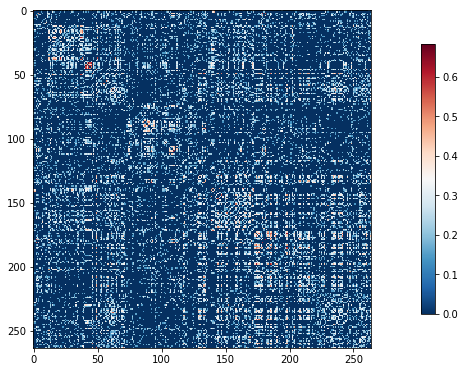

In [35]:
nilearn.plotting.plot_matrix(A)